In [157]:
%load_ext lab_black
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [158]:
minute_data = pd.read_csv("Binance_BTC_1m.csv")
# minute_data = pd.read_csv("Huobi_BTC_1h.csv")
# minute_data = minute_data.rename(
#     columns={"close": "Close", "candle_begin_time": "TimeStamp"}
# )
# minute_data["TimeStamp"] = pd.to_datetime(minute_data["TimeStamp"])
minute_data

,TimeStamp,Open,High,Low,Close,Volume
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920
...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468


In [159]:
N = 20
k = 2 / (N + 1)
SMA_COLUMN_NAME = f"SMA-{N}"
EMA_COLUMN_NAME = f"EMA-{N}"
# EMA=Price(today)×k+EMA(yesterday)×(1−k)
minute_data[SMA_COLUMN_NAME] = minute_data["Close"].rolling(N, min_periods=1).mean()
minute_data[EMA_COLUMN_NAME] = minute_data["Close"] * k + minute_data[
    SMA_COLUMN_NAME
] * (1 - k)
minute_data[EMA_COLUMN_NAME] = minute_data["Close"] * k + minute_data[
    EMA_COLUMN_NAME
].shift() * (1 - k)
minute_data

,TimeStamp,Open,High,Low,Close,Volume,SMA-20,EMA-20
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795,17864.4100,NaN
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429,17854.5700,17862.535714
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989,17845.8300,17851.224966
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483,17835.2875,17840.307596
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920,17828.2260,17829.199609
...,...,...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696,57662.6800,57693.468764
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250,57659.1320,57685.767846
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530,57655.1935,57684.744608
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468,57656.9245,57680.841210


In [160]:
N = 40
k = 2 / (N + 1)
SMA_COLUMN_NAME = f"SMA-{N}"
EMA_COLUMN_NAME = f"EMA-{N}"
# EMA=Price(today)×k+EMA(yesterday)×(1−k)
minute_data[SMA_COLUMN_NAME] = minute_data["Close"].rolling(N, min_periods=1).mean()
minute_data[EMA_COLUMN_NAME] = minute_data["Close"].iloc[0] * k + minute_data[
    SMA_COLUMN_NAME
].iloc[0] * (1 - k)
minute_data[EMA_COLUMN_NAME] = minute_data["Close"] * k + minute_data[
    EMA_COLUMN_NAME
].shift() * (1 - k)
minute_data

,TimeStamp,Open,High,Low,Close,Volume,SMA-20,EMA-20,SMA-40,EMA-40
0,2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795,17864.4100,NaN,17864.41000,NaN
1,2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429,17854.5700,17862.535714,17854.57000,17863.450000
2,2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989,17845.8300,17851.224966,17845.83000,17862.650976
3,2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483,17835.2875,17840.307596,17835.28750,17861.446585
4,2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920,17828.2260,17829.199609,17828.22600,17861.267073
...,...,...,...,...,...,...,...,...,...,...
199476,2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696,57662.6800,57693.468764,57881.31075,19810.443659
199477,2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250,57659.1320,57685.767846,57866.42275,19813.403171
199478,2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530,57655.1935,57684.744608,57852.88875,19811.689024
199479,2021-04-06 22:41:00,57783.62,57828.57,57760.00,57808.29,60.350468,57656.9245,57680.841210,57842.92050,19812.891951


In [161]:
minute_data["MACD"] = minute_data["EMA-20"] - minute_data["EMA-40"]
minute_data["Signal line"] = minute_data["MACD"].rolling(9, min_periods=1).mean()
minute_data = minute_data.set_index("TimeStamp")
minute_data

,Open,High,Low,Close,Volume,SMA-20,EMA-20,SMA-40,EMA-40,MACD,Signal line
TimeStamp,,,,,,,,,,,
2020-11-19 01:23:00,17844.72,17878.78,17843.08,17864.41,128.141795,17864.4100,NaN,17864.41000,NaN,NaN,NaN
2020-11-19 01:24:00,17863.82,17864.32,17844.14,17844.73,66.757429,17854.5700,17862.535714,17854.57000,17863.450000,-0.914286,-0.914286
2020-11-19 01:25:00,17844.73,17849.41,17826.35,17828.35,53.699989,17845.8300,17851.224966,17845.83000,17862.650976,-11.426010,-6.170148
2020-11-19 01:26:00,17828.36,17829.99,17801.54,17803.66,112.517483,17835.2875,17840.307596,17835.28750,17861.446585,-21.138989,-11.159761
2020-11-19 01:27:00,17803.66,17806.29,17783.68,17799.98,45.482920,17828.2260,17829.199609,17828.22600,17861.267073,-32.067464,-16.386687
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 22:38:00,57798.97,57831.81,57716.14,57758.10,94.209696,57662.6800,57693.468764,57881.31075,19810.443659,37883.025106,37913.389413
2021-04-06 22:39:00,57758.09,57825.10,57745.28,57818.77,63.622250,57659.1320,57685.767846,57866.42275,19813.403171,37872.364675,37902.203450
2021-04-06 22:40:00,57818.77,57860.83,57760.66,57783.63,96.278530,57655.1935,57684.744608,57852.88875,19811.689024,37873.055583,37895.171651


## MACD - Moving Average Convergence Divergence
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default), 8-17-9 MACD (more responsive))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

**Signal**
- MACD > Signal line

In [162]:
# ticker = "BTC-USD"
# start = dt.datetime(2019, 1, 1)
# data = pdr.get_data_yahoo(ticker, start)

In [163]:
# data

In [164]:
# exp1 = data["Adj Close"].ewm(span=12, adjust=False).mean()
# exp2 = data["Adj Close"].ewm(span=26, adjust=False).mean()
# data["MACD"] = exp1 - exp2
# data["Signal line"] = data["MACD"].ewm(span=9, adjust=False).mean()

In [165]:
# data.tail()

<AxesSubplot:label='d686ff5a-d89d-433c-9e36-04f529d5c7e4'>

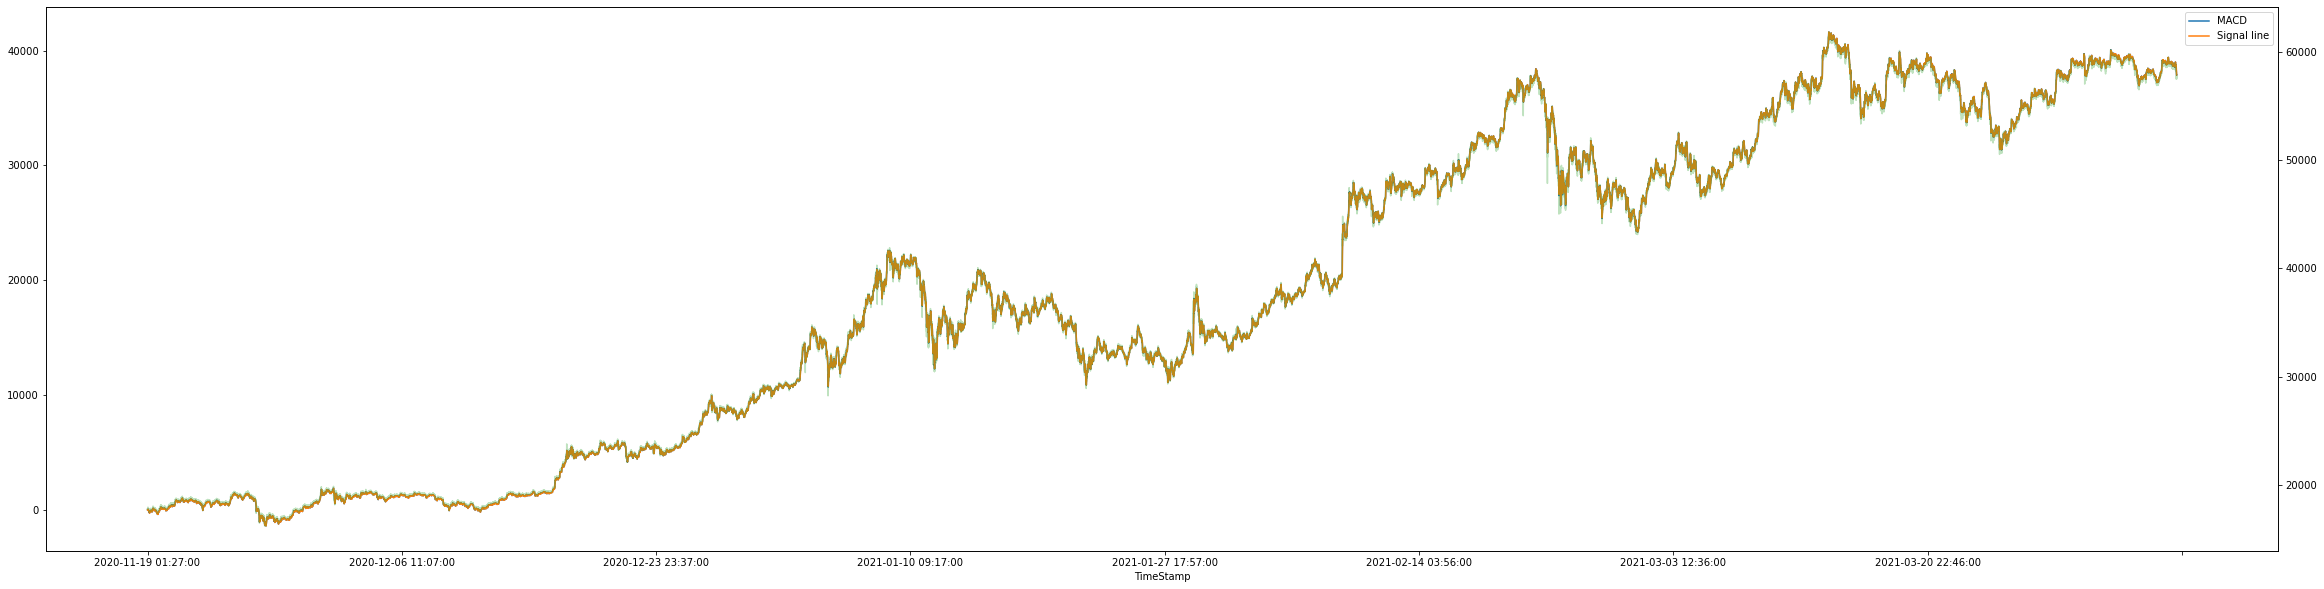

In [173]:
import matplotlib.pyplot as plt

%matplotlib inline
data = minute_data
fig, ax = plt.subplots(figsize=(40, 10))
start_time = "2020-11-19 01:27:00"
# start_time="1970-01-01 00:26:49.860"
data[["MACD", "Signal line"]].loc[start_time:].plot(ax=ax)
data["Close"].loc[start_time:].plot(ax=ax, secondary_y=True, alpha=0.3)

In [167]:
# data = data.loc[100:]
# data

In [168]:
# data = data.iloc[::-1]
# data

In [169]:
data[["Close", "MACD", "Signal line"]]

,Close,MACD,Signal line
TimeStamp,,,
2020-11-19 01:23:00,17864.41,NaN,NaN
2020-11-19 01:24:00,17844.73,-0.914286,-0.914286
2020-11-19 01:25:00,17828.35,-11.426010,-6.170148
2020-11-19 01:26:00,17803.66,-21.138989,-11.159761
2020-11-19 01:27:00,17799.98,-32.067464,-16.386687
...,...,...,...
2021-04-06 22:38:00,57758.10,37883.025106,37913.389413
2021-04-06 22:39:00,57818.77,37872.364675,37902.203450
2021-04-06 22:40:00,57783.63,37873.055583,37895.171651


In [170]:
import numpy as np

df = data.copy()
df["difference"] = df["MACD"] - df["Signal line"]

df["cross"] = np.sign(df.difference.shift(1)) != np.sign(df.difference)
# np.sum(df.cross) - 1
df = df.loc[df["cross"] == True]
# df
df[["Close", "MACD", "Signal line", "difference", "cross"]]

,Close,MACD,Signal line,difference,cross
TimeStamp,,,,,
2020-11-19 01:23:00,17864.41,NaN,NaN,NaN,True
2020-11-19 01:24:00,17844.73,-0.914286,-0.914286,0.000000,True
2020-11-19 01:25:00,17828.35,-11.426010,-6.170148,-5.255862,True
2020-11-19 01:37:00,17830.80,-47.541225,-52.166147,4.624922,True
2020-11-19 01:40:00,17781.79,-52.039429,-51.696471,-0.342958,True
...,...,...,...,...,...
2021-04-06 20:45:00,58846.33,39006.243901,39009.083256,-2.839355,True
2021-04-06 21:19:00,58615.61,38733.074540,38725.103471,7.971069,True
2021-04-06 21:27:00,58540.13,38736.988734,38739.352332,-2.363598,True


## Strategy

1. Find the crossing point of MACD and signal line
2. Buying only when the trend is increasing
3. Selling only whne the trend is decreasing 

In [178]:
import datetime

# start_time = "2020-01-02"

i = 0
profit = 0
records = []
n = 0
for index, row in df.iterrows():
    day = datetime.datetime.strptime(index, "%Y-%m-%d %H:%M:%S")
    #     day = index.strftime("%Y-%m-%d %H:%M:%S")
    #     if i % 2 == 0:
    if (
        row["MACD"] > row["Signal line"] and n == 0
    ):  # Buying when the trend is increasing
        profit -= row["Close"]
        print(
            f"Buying 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
        )
        records.append(["Buying", -round(row["Close"]), round(profit), day])
        n += 1
    #     else:
    if (
        row["MACD"] < row["Signal line"] and n > 0 and profit + row["Close"] > 0
    ):  # Selling when the trend is decreasing
        profit += row["Close"]
        print(
            f"Selling 1 BTC @ USD {round(row['Close'])}, total profit: {round(profit)} on {day}"
        )
        records.append(["Selling", round(row["Close"]), round(profit), day])
        n -= 1
    i += 1
print(f"\nTotal profit: {round(profit)}")
# df.loc[start_time:]
# records

Buying 1 BTC @ USD 17831, total profit: -17831 on 2020-11-19 01:37:00
Selling 1 BTC @ USD 17883, total profit: 52 on 2020-11-19 02:21:00
Buying 1 BTC @ USD 17920, total profit: -17868 on 2020-11-19 02:25:00
Selling 1 BTC @ USD 17872, total profit: 4 on 2020-11-19 02:47:00
Buying 1 BTC @ USD 17880, total profit: -17876 on 2020-11-19 02:52:00
Selling 1 BTC @ USD 17956, total profit: 80 on 2020-11-19 10:39:00
Buying 1 BTC @ USD 17961, total profit: -17881 on 2020-11-19 11:02:00
Selling 1 BTC @ USD 17924, total profit: 43 on 2020-11-19 11:20:00
Buying 1 BTC @ USD 17913, total profit: -17871 on 2020-11-19 11:46:00
Selling 1 BTC @ USD 17891, total profit: 20 on 2020-11-19 11:49:00
Buying 1 BTC @ USD 17913, total profit: -17893 on 2020-11-19 11:58:00
Selling 1 BTC @ USD 17916, total profit: 23 on 2020-11-19 21:47:00
Buying 1 BTC @ USD 17927, total profit: -17904 on 2020-11-19 21:49:00
Selling 1 BTC @ USD 17939, total profit: 35 on 2020-11-19 21:50:00
Buying 1 BTC @ USD 17954, total profit: -1

In [179]:
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
records_df

Total profit: USD -59,586



,Action,Price,Profit,Day
0,Buying,-17831,-17831,2020-11-19 01:37:00
1,Selling,17883,52,2020-11-19 02:21:00
2,Buying,-17920,-17868,2020-11-19 02:25:00
3,Selling,17872,4,2020-11-19 02:47:00
4,Buying,-17880,-17876,2020-11-19 02:52:00
...,...,...,...,...
6986,Buying,-59580,-59498,2021-04-02 16:04:00
6987,Selling,59515,17,2021-04-02 16:07:00
6988,Buying,-59555,-59538,2021-04-02 16:16:00
6989,Selling,59544,7,2021-04-02 18:01:00


In [85]:
import pandas as pd

writer = pd.ExcelWriter(
    "technical.xlsx",
    engine="xlsxwriter",
    date_format="yyyy-mm-dd",
    datetime_format="yyyy-mm-dd",
)

sheet_name = "MACD"
data[["Close", "MACD", "Signal line"]].to_excel(writer, sheet_name=sheet_name)

worksheet = writer.sheets[sheet_name]
workbook = writer.book

# Create a format for a green cell
green_cell = workbook.add_format({"bg_color": "#C6EFCE", "font_color": "#006100"})

# Create a format for a red cell
red_cell = workbook.add_format({"bg_color": "#FFC7CE", "font_color": "#9C0006"})


# Set column width of Date
worksheet.set_column(0, 0, 15)

for col in range(1, 4):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(
        1,
        col,
        len(data),
        col,
        {"type": "formula", "criteria": "=C2>=D2", "format": green_cell},
    )

    # Create a conditional formatted of type formula
    worksheet.conditional_format(
        1,
        col,
        len(data),
        col,
        {"type": "formula", "criteria": "=C2<D2", "format": red_cell},
    )


# Create a new chart object.
chart1 = workbook.add_chart({"type": "line"})

# Add a series to the chart.
chart1.add_series(
    {
        "name": "MACD",
        "categories": [sheet_name, 1, 0, len(data), 0],
        "values": [sheet_name, 1, 2, len(data), 2],
    }
)

# Create a new chart object.
chart2 = workbook.add_chart({"type": "line"})

# Add a series to the chart.
chart2.add_series(
    {
        "name": "Signal line",
        "categories": [sheet_name, 1, 0, len(data), 0],
        "values": [sheet_name, 1, 3, len(data), 3],
    }
)

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({"name": sheet_name + " " + ticker})
chart1.set_x_axis({"name": "Date"})
chart1.set_y_axis({"name": "MACD"})


# To set the labels on x axis not on 0
chart1.set_x_axis({"label_position": "low", "num_font": {"rotation": 45}})

# Insert the chart into the worksheet.
worksheet.insert_chart("F2", chart1)


writer.close()

NameError: name 'ticker' is not defined